In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import random
import time
import matplotlib.pyplot as plt

from skimage.transform import resize
from tqdm import tqdm # progress which the model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('GalaxyZoo/training_solutions_rev1.csv')
print("El dataset tiene " + str(df.shape[0]) + " filas y " + str(df.shape[1]) + " columnas.")
df.head()

El dataset tiene 61578 filas y 38 columnas.


,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


## Separamos entre training y testing

In [3]:
df_train, df_test = train_test_split(df[:30000], test_size=0.2, random_state=42)
print("El conjunto de entrenamiento tiene forma", df_train.shape)
print("El conjunto de prueba tiene forma", df_test.shape)

El conjunto de entrenamiento tiene forma (24000, 38)
El conjunto de prueba tiene forma (6000, 38)


In [4]:
df_train.describe()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,320594.056208,0.430368,0.544842,0.024790,0.107513,0.437329,0.102317,0.335012,0.217030,0.220299,...,0.033109,0.092307,0.084450,0.040273,0.015441,0.094735,0.017811,0.007573,0.007093,0.074375
std,126619.098983,0.282792,0.295557,0.037028,0.213953,0.302244,0.177002,0.248387,0.285987,0.179451,...,0.099073,0.145359,0.140342,0.101303,0.052082,0.194877,0.068275,0.038224,0.037687,0.107902
min,100008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,209654.500000,0.176245,0.285108,0.000000,0.000000,0.169317,0.000000,0.123459,0.000000,0.072815,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,323148.500000,0.414047,0.561662,0.014683,0.000000,0.399377,0.000000,0.292182,0.094934,0.184943,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,429132.500000,0.675712,0.811246,0.033935,0.087150,0.696268,0.134753,0.520171,0.336768,0.338788,...,0.000000,0.148840,0.127553,0.030458,0.000000,0.098276,0.000000,0.000000,0.000000,0.129786
max,540177.000000,1.000000,1.000000,0.935147,1.000000,1.000000,1.000000,1.000000,1.000000,0.925311,...,0.901991,0.949733,0.850616,0.991539,0.825312,1.000000,0.975913,0.957000,0.938881,0.664057


## Exploratory Data Analysis para las imagenes

In [5]:
trainPath = 'GalaxyZoo/images_training_rev1/'
testPath = 'GalaxyZoo/images_test_rev1/'

In [6]:
def plot_random_galaxy(path, sample = 5):
    random_image=random.sample(os.listdir(path),sample) #Lista todo los archivos en el directorio y selecciona 'sample' aleatoriamente
 
    plt.figure(figsize=(16,5))
    for i in range(sample):
        
        plt.subplot(1,sample,i+1) #
        img=tf.io.read_file(os.path.join(path,random_image[i])) # construye ruta completa (ej: 'GalaxyZoo/images_training_rev1/123.jpg' 
        img=tf.io.decode_image(img)
        plt.imshow(img)
        plt.title(f'Class: {random_image[i]}\nShape: {img.shape}')
        plt.axis(False) 

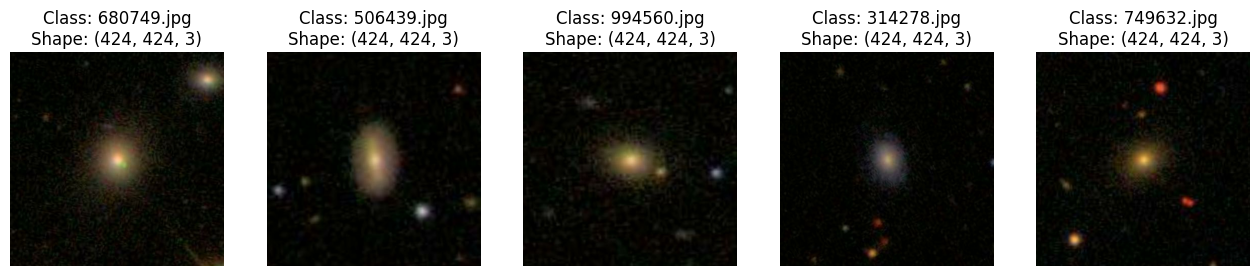

In [7]:
plot_random_galaxy(trainPath)

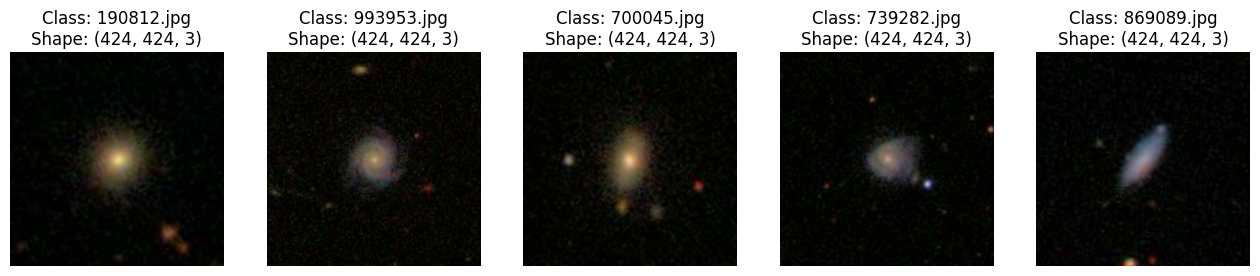

In [8]:
plot_random_galaxy(testPath)

In [ ]:
ORIG_SHAPE = (424,424)
CROP_SIZE = (256,256)
IMG_SHAPE = (64,64)

tt = time.time()
def get_image(path, x1,y1, shape, crop_size): #Lee la imagen desde el path, la recorta y la redimensiona
    x = plt.imread(path)
    x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]] #Recorta la imagen
    x = resize(x, shape) #Redimensiona la imagen
    x = x/255. #Normaliza la imagen
    return x
    
def get_all_images(dataframe, shape=IMG_SHAPE, crop_size=CROP_SIZE): #Obtiene todas las imágenes del dataframe, las recorta y redimensiona
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
   
    sel = dataframe.values
    ids = sel[:,0].astype(int).astype(str)
    y_batch = sel[:,1:]
    x_batch = []
    for i in tqdm(ids):
        x = get_image('C:\\Users\\djara\\Documents\\ML-team\\Modelos-DL\\Projecto Galaxias\\GalaxyZoo\\images_training_rev1\\'+i+'.jpg', x1,y1, shape=shape, crop_size=crop_size)
        x_batch.append(x)
    x_batch = np.array(x_batch)
    return x_batch, y_batch
        
X_train, y_train = get_all_images(df_train)
X_test, y_test = get_all_images(df_test)
print('Procesado en: ', time.time()-tt, " segundos")

100%|██████████| 6000/6000 [01:24<00:00, 70.65it/s]


In [13]:
print("Forma del train: ",X_train.shape)

Forma del train:  (24000, 64, 64, 3)


## Creamos la red neuronal

In [36]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D
from keras import backend as K
from tensorflow.keras import layers #type: ignore


model = Sequential([
    layers.Conv2D(256, (3, 3), activation='relu', input_shape=(IMG_SHAPE[0], IMG_SHAPE[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(37, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 62, 62, 256)    │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 31, 31, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 29, 29, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 12, 12, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 37)             │         9,509 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,762,917 (6.72 MB)

 Trainable params: 1,762,917 (6.72 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
t = time.time()
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
print('Tiempo de entrenamiento: ', time.time()-t, " segundos")

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 145s 192ms/step - accuracy: 0.5897 - loss: 0.3083 - val_accuracy: 0.5958 - val_loss: 0.3003
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 148s 197ms/step - accuracy: 0.5992 - loss: 0.3007 - val_accuracy: 0.5958 - val_loss: 0.3002
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 143s 191ms/step - accuracy: 0.5992 - loss: 0.3002 - val_accuracy: 0.5958 - val_loss: 0.3002
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 146s 195ms/step - accuracy: 0.5992 - loss: 0.2999 - val_accuracy: 0.5958 - val_loss: 0.3000
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 146s 195ms/step - accuracy: 0.5992 - loss: 0.2998 - val_accuracy: 0.5958 - val_loss: 0.3001
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 157s 209ms/step - accuracy: 0.5992 - loss: 0.2998 - val_accuracy: 0.5958 - val_loss: 0.3000
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 153s 204ms/step - accuracy: 0.5992 - loss: 0.2997 - val_accuracy: 0.5958 - val_loss: 0.3001
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 151s 202ms/step - accuracy: 0.5992 -